Before running the code place the zipped birds data downloaded from the link in the google drive.  
pass the location OF the file TO *data_source* parameter.  
model_output should be assigned with dircetory name where the checkpoint model has to be saved.  
After running the first few script. new folder named *data* will be created with the following structure.   
-----*data*  
----------*CUB_200_2011*   
-------------*images_sorted*   
----------------*test*  
------------------test images will be presnt in this folder under different sub directories    
----------------*train*  
------------------train images will be presnt in this folder under different sub directories   

In [ ]:
import os
data_source='/content/gdrive/MyDrive/birds_classification_data/bird_CUB_200_2011.zip'
#model_output='/content/gdrive/MyDrive/birds_check_points/'
#model_file=os.path.join(model_output,'model.{epoch:02d}-{val_accuracy:.2f}.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import sys
from matplotlib import pyplot as plt
import random
import math
import shutil

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile(data_source, 'r') #Opens the zip file in read
zip_ref.extractall('/data') #Extracts the files into the /data folder
zip_ref.close()

In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00


In [ ]:
def load_train_test_split(dataset_path=''):
    train_images = []
    test_images = []
    with open(os.path.join(dataset_path, 'train_test_split.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            is_train = int(pieces[1])
            if is_train:
                train_images.append(image_id)
            else:
                test_images.append(image_id)
    return train_images, test_images

def load_class_names(dataset_path=''):
    names = {}
    with open(os.path.join(dataset_path, 'classes.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            class_id = pieces[0]
            names[class_id] = ' '.join(pieces[1:])
    return names

def load_image_labels(dataset_path=''):
    labels = {}
    with open(os.path.join(dataset_path, 'image_class_labels.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            class_id = pieces[1]
            labels[image_id] = class_id
    return labels
        
def load_image_paths(dataset_path='', path_prefix=''):
    paths = {}
    with open(os.path.join(dataset_path, 'images.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            path = os.path.join(path_prefix, pieces[1])
            paths[image_id] = path
    return paths

In [ ]:
root_data_dir = '/data/CUB_200_2011'
old_images_dir = 'images'
new_images_dir = 'images_sorted'

In [ ]:
train, test = load_train_test_split(dataset_path=root_data_dir)
labels = load_image_labels(dataset_path=root_data_dir)
image_paths = load_image_paths(dataset_path=root_data_dir)

In [ ]:
images_train_dir = os.path.join(root_data_dir,new_images_dir,'train')
images_test_dir = os.path.join(root_data_dir,new_images_dir,'test')

os.makedirs(os.path.join(root_data_dir,new_images_dir), exist_ok=True)
os.makedirs(images_train_dir, exist_ok=True)
os.makedirs(images_test_dir, exist_ok=True)

In [ ]:
for image in train:
    new_dir = os.path.join(images_train_dir,image_paths[image].split('/')[0])
    old_path_image = os.path.join(root_data_dir,old_images_dir,image_paths[image])
    new_path_image = os.path.join(images_train_dir,image_paths[image])
    os.makedirs(new_dir, exist_ok=True)
    #os.symlink(old_path_image, new_path_image)
    shutil.move(old_path_image, new_path_image)

In [ ]:
for image in test:
    new_dir = os.path.join(images_test_dir,image_paths[image].split('/')[0])
    old_path_image = os.path.join(root_data_dir,old_images_dir,image_paths[image])
    new_path_image = os.path.join(images_test_dir,image_paths[image])
    os.makedirs(new_dir, exist_ok=True)
    #os.symlink(old_path_image, new_path_image)
    shutil.move(old_path_image, new_path_image)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=24,
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='nearest'
    ) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/data/CUB_200_2011/images_sorted/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/data/CUB_200_2011/images_sorted/train', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory('/data/CUB_200_2011/images_sorted/test',
                                                target_size=(224, 224),batch_size=64,class_mode='categorical',shuffle=0,color_mode='rgb')    


Found 5400 images belonging to 200 classes.
Found 594 images belonging to 200 classes.
Found 5794 images belonging to 200 classes.


In [ ]:
import pandas as pd
bird_class=pd.DataFrame(train_generator.class_indices.items(),columns=['b_class','index'])
k=[]
for i in range(0,199):
 c=bird_class['b_class'].iloc[i].split('.')[1]
 k.append(c)

In [ ]:
x_train,y_train=train_generator.next()
x_test,y_test=test_generator.next()

In [ ]:
import numpy as np
vis_y_train=np.argmax(y_train,axis=1)

CIFAR-10 Dataset!


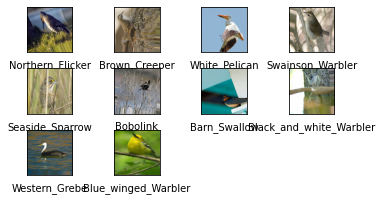

In [ ]:
# Required imports:
import matplotlib.pyplot as plt

# Loading the dataset:
print('CIFAR-10 Dataset!')

class_names = k

# -----------------------------
# This function will display the first 16 images of the dataset with their labels:
def visualize_data(train_X, train_Y, class_names):

  for i in range(10):
    # create subplot:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    # plot image with the class name on the x-axis:
    plt.imshow(train_X[i])
    plt.xlabel(class_names[int(vis_y_train[i].item())])

  # adjust the subplots and show the first 16 images:
  plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
  plt.show()
# -----------------------------

# Displaying the first sixteen images within the dataset:
visualize_data(x_train, y_train, class_names)


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import save_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow import keras
import tensorflow as tf

print('Keras version:', keras.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Keras version: 2.11.0
Num GPUs Available:  1


We will also define a function responsible for plotting the curves:

In [ ]:
# Function used to plot the curves for loss and accuracy:
def plot_curves(history):

  # Plotting the loss curve:
  plt.subplot(211)
  plt.title('Cross Entropy')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  # Plotting the training loss (blue):
  plt.plot(history.history['loss'], color='blue', label='train')
  # Plotting the test loss (red):
  plt.plot(history.history['val_loss'], color='red', label='test')
  # Legend for the plot:
  plt.legend(['train', 'test'], loc='upper left')

  # Plotting the accuracy curve:
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  # Plotting the training accuracy (blue):
  plt.plot(history.history['accuracy'], color='blue', label='train')
  # Plotting the test accuracy (red):
  plt.plot(history.history['val_accuracy'], color='red', label='test')
  # Legend for the plot:
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplots_adjust(top=3)
  plt.show()

print('Done!')

Done!


Now, we are ready to define our classification model. To enable experimenting on several networks, in the following, we add support for selecting what architecture we are going to use. 


In [ ]:
# These networks are supported:
network_names = [ 'mobilenet', 'resnet50', 'vgg16', 'vgg19', 'densenet121','InceptionV3' ]

print("The following network architectures are available: ", network_names)

####################################
# The network id is selected here: #
network_id = 5
####################################

selected_network = network_names[network_id]
print(f"Selected network: {selected_network}")

The following network architectures are available:  ['mobilenet', 'resnet50', 'vgg16', 'vgg19', 'densenet121', 'InceptionV3']
Selected network: InceptionV3


In [ ]:
from keras.layers.regularization.dropout import Dropout
from keras.layers.serialization import activation
# Importing the models:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

# This function defines our classification network:
def create_model(selected_network):

  # The model is selected amongst the supported architectures:
  model_name = {
    'mobilenet'   : MobileNet,
    'resnet50'    : ResNet50,
    'vgg16'       : VGG16,
    'vgg19'       : VGG19,
    'densenet121' : DenseNet121,
    'InceptionV3' : InceptionV3
  }[selected_network]

  base_model = model_name(input_shape=(224,224,3), weights='imagenet', include_top=False)
  '''x = base_model.output
  #x = keras.layers.Flatten()(x)
  x = GlobalAveragePooling2D()(x)
  #x= tf.keras.layers.Dropout(0.5)(x)
  output = keras.layers.Dense(200, activation='softmax')(x)
  model = keras.models.Model(inputs=[base_model.input], outputs=[output])'''
  model=Sequential()
  model.add(base_model)
  model.add(GlobalAveragePooling2D())
  model.add(Dropout(0.8))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(200,activation='softmax'))

  # The optimiser is stochastic gradient descent with a learning rate of 0.01 and a momentum of 0.9:
  optim = Adam(learning_rate=0.00001)
  base_model.trainable = True
  print("Number of layers in the base model: ", len(base_model.layers))

  # Fine-tune from this layer onwards
  #fine_tune_at = 82

  # Freeze all the layers before the `fine_tune_at` layer
  #for layer in base_model.layers[:fine_tune_at]:
  # layer.trainable = False

  # The model optimises cross entropy as its loss function and will monitor classification accuracy:
  model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
  # Printing model summary:
  print(model.summary())

  return model

print('Done!')

Done!


In [ ]:
model = create_model(selected_network)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bcbd6486424b2319ff4ef7d526e38f63 so we will re-download the data.
87910968/87910968 [==============================] - 5s 0us/step
Number of layers in the base model:  311
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                  

In [ ]:
'''checkpoint_path = "/content/gdrive/MyDrive/birds_check_points/model.{epoch:02d}-{val_accuracy:.2f}.h5" #you can uncomment this and pass this varibale in fit() to generate model after each epochs
checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,  
                                                      verbose=1)''' 

In [ ]:
#for saving the model once it reaches certain accuracy
class SaveModelOnAccuracy(Callback):
    def __init__(self, save_path, monitor='val_accuracy', target_accuracy=0.95):
        super(SaveModelOnAccuracy, self).__init__()
        self.save_path = save_path
        self.monitor = monitor
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get(self.monitor)
        if current_accuracy is not None and current_accuracy >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy:.2f}% validation accuracy, saving model...")
            save_model(self.model, self.save_path)

In [ ]:
#model=keras.models.load_model('/content/gdrive/MyDrive/birds_check_points/model.{epoch_02d}-{val_accuracy_.2f}.h5') #use the code for training from the check points. 

In [ ]:
save_callback = SaveModelOnAccuracy("/content/gdrive/MyDrive/birds_check_points/model.{epoch:02d}-{val_accuracy:.2f}.h5", target_accuracy=0.75)
history=model.fit(
    train_generator,
    steps_per_epoch = 85,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs = 250,callbacks=[save_callback])

Epoch 1/250
85/85 [==============================] - 91s 528ms/step - loss: 5.5978 - accuracy: 0.0044 - val_loss: 5.3688 - val_accuracy: 0.0031
Epoch 2/250
85/85 [==============================] - 44s 511ms/step - loss: 5.4839 - accuracy: 0.0033 - val_loss: 5.3066 - val_accuracy: 0.0063
Epoch 3/250
85/85 [==============================] - 46s 534ms/step - loss: 5.4218 - accuracy: 0.0059 - val_loss: 5.2960 - val_accuracy: 0.0063
Epoch 4/250
85/85 [==============================] - 43s 508ms/step - loss: 5.3697 - accuracy: 0.0037 - val_loss: 5.2707 - val_accuracy: 0.0156
Epoch 5/250
85/85 [==============================] - 43s 506ms/step - loss: 5.3319 - accuracy: 0.0052 - val_loss: 5.2866 - val_accuracy: 0.0125
Epoch 6/250
85/85 [==============================] - 43s 507ms/step - loss: 5.3155 - accuracy: 0.0074 - val_loss: 5.2837 - val_accuracy: 0.0094
Epoch 7/250
85/85 [==============================] - 44s 512ms/step - loss: 5.3068 - accuracy: 0.0099 - val_loss: 5.2851 - val_accuracy:

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
save_callback = SaveModelOnAccuracy("/content/gdrive/MyDrive/birds_check_points/mode_refined_2022.h5", target_accuracy=0.76)
history=model.fit(
    train_generator,
    steps_per_epoch = 85,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs = 10,callbacks=[save_callback])

Epoch 1/10
85/85 [==============================] - 74s 668ms/step - loss: 0.0644 - accuracy: 0.9904 - val_loss: 1.2119 - val_accuracy: 0.7406
Epoch 2/10
85/85 [==============================] - 55s 642ms/step - loss: 0.0585 - accuracy: 0.9926 - val_loss: 1.4519 - val_accuracy: 0.6750
Epoch 3/10
85/85 [==============================] - 54s 638ms/step - loss: 0.0682 - accuracy: 0.9871 - val_loss: 1.2664 - val_accuracy: 0.7375
Epoch 4/10
50/85 [================>.............] - ETA: 19s - loss: 0.0691 - accuracy: 0.9894

In [ ]:
model.save('/content/gdrive/MyDrive/birds_check_points/mode_refined_2022_71.h5')

#Testing

In [ ]:
load_model=keras.models.load_model('/210409183_birds_classification_model.h5') #pass the model name from the checkpointbased on validation accuracy

In [ ]:
ev=load_model.evaluate_generator(test_generator)
print('Accuracy: %.3f' % (ev[1] * 100.0))

<ipython-input-29-583b01a16bff>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  ev=load_model.evaluate_generator(test_generator)


Accuracy: 71.695


In [ ]:
import numpy as np
y_pred = load_model.predict_generator(test_generator)

<ipython-input-24-7e0928ab9df9>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = load_model.predict_generator(test_generator)


##confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

clas_pred=np.argmax(y_pred,axis=1)
y_true = test_generator.classes
cm = confusion_matrix(y_true, clas_pred)
print(cm)# since the class is 200 it's better to view it in heatmap if neccesary it can be download as .csv

[[22  1  5 ...  0  0  0]
 [ 0 20  3 ...  0  0  0]
 [ 2  2 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 27]]


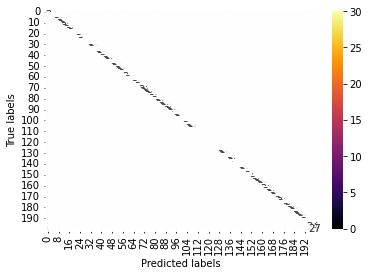

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='inferno')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,clas_pred)) # classwise precision,recall and f1score as well as thier aggregated value.

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.80      0.67      0.73        30
           2       0.53      0.68      0.59        28
           3       0.80      0.80      0.80        30
           4       0.75      0.86      0.80        14
           5       0.83      0.91      0.87        11
           6       0.96      0.96      0.96        23
           7       0.78      0.78      0.78        18
           8       0.47      0.52      0.49        29
           9       0.96      0.83      0.89        30
          10       0.55      0.53      0.54        30
          11       1.00      0.92      0.96        26
          12       1.00      0.80      0.89        30
          13       0.81      0.87      0.84        30
          14       0.89      0.89      0.89        28
          15       1.00      0.86      0.92        28
          16       0.93      0.96      0.95        27
          17       0.88    

We can plot the loss and accuracy curves to better analyse the training process.

The **blue** curves indicate performance over the **training data** and the *red* curves represent model performance over the *test data*:

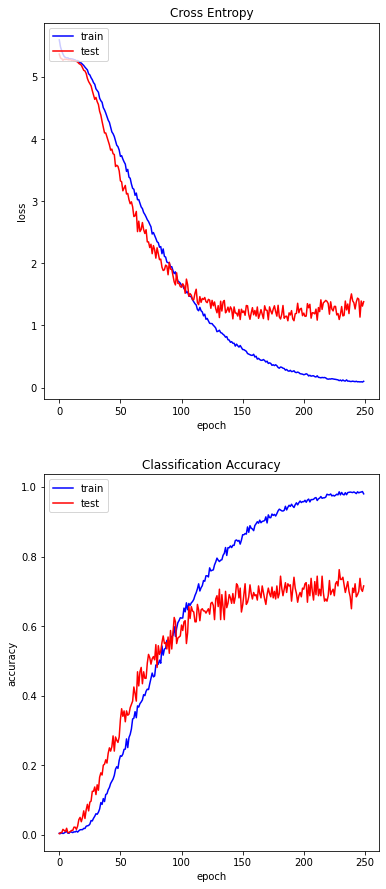

In [ ]:
plot_curves(history)